In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# === Load Data ===
X = np.load("formations_dataset.npy")  # shape = (12, 22, 100, 2)
with open("formation_names.txt", "r") as f:
    names = [line.strip() for line in f]

# === Flatten each formation ===
# From (22, 100, 2) → (22 * 100 * 2) = 4400 features per sample
X_flat = X.reshape((X.shape[0], -1))

# === PCA Reduction to 2D ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

# === Plot PCA ===
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
for i, name in enumerate(names):
    plt.text(X_pca[i, 0], X_pca[i, 1], name[:10], fontsize=8)
plt.title("PCA Projection of Formations")
plt.xlabel("PC1")
plt.ylabel("PC2")


In [ ]:
# === t-SNE for more expressive (nonlinear) view ===
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

# === Plot t-SNE ===
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='green')
for i, name in enumerate(names):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], name[:10], fontsize=8)
plt.title("t-SNE Projection of Formations")

plt.tight_layout()
plt.show()

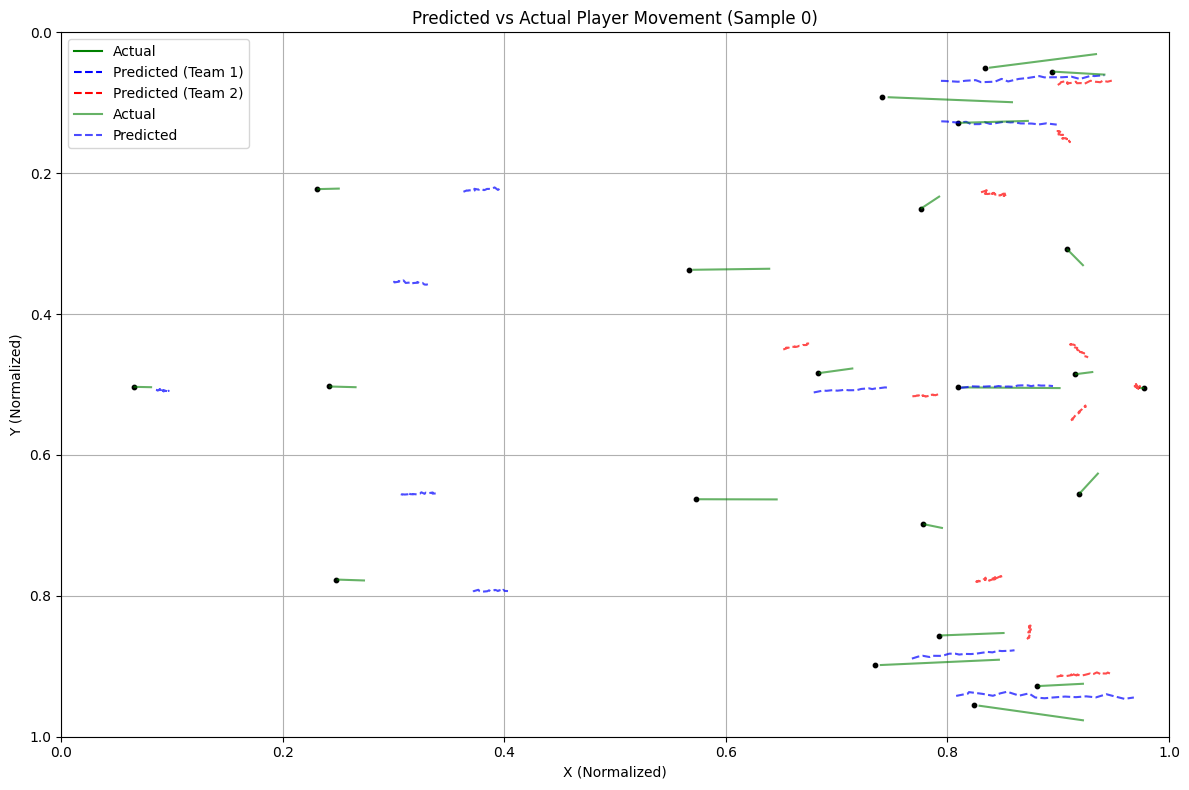

In [4]:
# === Load test data & predictions ===
X_players = np.load("C:\\Users\\anshu\\Desktop\\Simulation_Project\\Working_Data\\X_players.npy")
y_players = np.load("C:\\Users\\anshu\\Desktop\\Simulation_Project\\Working_Data\\y_players.npy")
predictions = np.load("C:\\Users\\anshu\\Desktop\\Simulation_Project\\Working_Data\\test_predictions.npy")  # (samples, 22, 20, 2)

# Pick a test sample index (0 is fine)
sample_idx = 0

y_true = y_players[sample_idx]        # (22, 20, 2)
y_pred = predictions[sample_idx]      # (22, 20, 2)
start_positions = X_players[sample_idx, :, -1, :]  # last input position (22, 2)

# === Plotting ===
plt.figure(figsize=(12, 8))
plt.title("Predicted vs Actual Player Movement (Sample {})".format(sample_idx))

for i in range(22):
    role_color = 'blue' if i < 11 else 'red'
    label = f"Player {i+1}"

    # Improve visual clarity (optional)
    if i == 0:
        plt.plot([], [], color='green', label='Actual')
        plt.plot([], [], linestyle='--', color='blue', label='Predicted (Team 1)')
        plt.plot([], [], linestyle='--', color='red', label='Predicted (Team 2)')

    # Plot actual path
    plt.plot(y_true[i, :, 0], y_true[i, :, 1], color='green', label="Actual" if i == 0 else "", alpha=0.6)

    # Plot predicted path
    plt.plot(y_pred[i, :, 0], y_pred[i, :, 1], linestyle='--', color=role_color, label="Predicted" if i == 0 else "", alpha=0.7)

    # Plot starting point
    plt.scatter(start_positions[i, 0], start_positions[i, 1], c='black', s=10)

# === Pitch boundaries ===
plt.xlim(0, 1.0)  # assuming normalized
plt.ylim(0, 1.0)
plt.xlabel("X (Normalized)")
plt.ylabel("Y (Normalized)")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
